# Transfer Learning


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [63]:
dataset = keras.datasets.cifar10
(x_train, y_train),(x_test,y_test) = dataset.load_data()

[9]
shape of input (32, 32, 3)
shape of inputs (50000, 32, 32, 3)


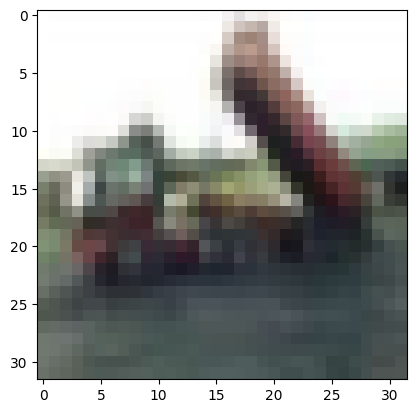

In [3]:
plt.imshow(x_train[2])
print(y_train[2])
print("shape of input",x_train[2].shape)
print("shape of inputs",x_train.shape)


In [67]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[32,32,3]))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dense(50))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Activation("selu"))
model1.add(keras.layers.Dense(50))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Activation("selu"))
model1.add(keras.layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model1.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'],)

In [ ]:
history1 =  model1.fit(x_train/255,y_train,epochs=20,validation_split=0.25)

In [7]:
model1.save("drive/MyDrive/model1.h5")

In [70]:
model1 = keras.models.load_model("drive/MyDrive/model1.h5")

In [71]:
model2 = keras.models.Sequential(model1.layers[:-1])
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [16]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3072)                │          12,288 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,888 (659.72 KB)

 Trainable params: 162,544 (634.94 KB)

 Non-trainable params: 6,344 (24.78 KB)

In [72]:
for layer in model2.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True
True


In [73]:
for layer in model2.layers[:-1]:
  layer.trainable = False
  print(layer.trainable)

False
False
False
False
False
False
False
False


In [74]:
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3072)                │          12,288 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,888 (659.72 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 168,888 (659.72 KB)

In [75]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
history2 =  model2.fit(x_train/255,y_train,epochs=20,validation_split=0.25)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1091 - loss: -63.5441 - val_accuracy: 0.1099 - val_loss: -252.2074
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1122 - loss: -321.9646 - val_accuracy: 0.1086 - val_loss: -504.0418
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1076 - loss: -581.9509 - val_accuracy: 0.1086 - val_loss: -755.8463
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1104 - loss: -830.4589 - val_accuracy: 0.1086 - val_loss: -1007.5678
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1116 - loss: -1098.4779 - val_accuracy: 0.1086 - val_loss: -1259.3423
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1104 - loss: -1346.5200 - val_accuracy: 0.1086 - val_loss: -1511.0979
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1091 - loss: -1593.3534 - val_accuracy: 0.1086 - val_loss: -1762.8369
Epoch 8/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 

In [77]:
model1.get_weights()[3]

array([0.08162911, 0.08052602, 0.09787758, ..., 0.06407299, 0.05945146,
       0.066034  ], dtype=float32)

In [78]:
model2.get_weights()[3]

array([0.08162911, 0.08052602, 0.09787758, ..., 0.06407299, 0.05945146,
       0.066034  ], dtype=float32)

# Clone Model

In [79]:
model1 = keras.models.load_model("drive/MyDrive/model1.h5")

In [80]:
model1_clone = keras.models.clone_model(model1)
model1_clone.set_weights(model1.get_weights())

In [81]:
model2 = keras.models.Sequential(model1.layers[:-1])
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [82]:
for layer in model2.layers[:-1]:
  layer.trainable = False
  print(layer.trainable)

False
False
False
False
False
False
False
False


In [83]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
history2 =  model2.fit(x_train/255,y_train,epochs=20,validation_split=0.25)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1044 - loss: -64.0778 - val_accuracy: 0.1089 - val_loss: -252.5659
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1137 - loss: -321.7003 - val_accuracy: 0.1083 - val_loss: -504.3920
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1085 - loss: -573.6967 - val_accuracy: 0.1084 - val_loss: -756.1238
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1102 - loss: -826.6295 - val_accuracy: 0.1085 - val_loss: -1007.8784
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1112 - loss: -1092.4340 - val_accuracy: 0.1085 - val_loss: -1259.6105
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1114 - loss: -1335.9692 - val_accuracy: 0.1085 - val_loss: -1511.3544
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1083 - loss: -1593.5264 - val_accuracy: 0.1085 - val_loss: -1763.0974
Epoch 8/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 

In [85]:
model2.get_weights()[2]

array([0.516562  , 0.53735244, 0.52341044, ..., 0.49612013, 0.49296284,
       0.44873294], dtype=float32)

In [86]:
model1.get_weights()[2]

array([0.516562  , 0.53735244, 0.52341044, ..., 0.49612013, 0.49296284,
       0.44873294], dtype=float32)

In [87]:
model1_clone.get_weights()[2]

array([0.516562  , 0.53735244, 0.52341044, ..., 0.49612013, 0.49296284,
       0.44873294], dtype=float32)

In [88]:
y_train_new = np.where(y_train==9,1,0)[:6000]

In [89]:
np.sum(y_train_new)

613

In [93]:
x_train_new = x_train[6000,:,:,:]

In [94]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
history2 =  model2.fit(x_train_new,y_train_new,epochs=20,validation_split=0.25)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_10_1/Cast:0", shape=(None, 32, 3), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (None, 32, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 3), dtype=uint8)
  • training=True
  • mask=None